In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [2]:
Dian_Licores = pd.read_csv('Merge_Dian_Licores.csv', low_memory=False)
Dian_Deportes = pd.read_csv('Merge_Dian_Deportes.csv', low_memory=False)
Dian_Municipios = pd.read_csv('Merge_Municipios_Dian.csv', low_memory=False)

Dian_Municipios['NoOmiso'] = Dian_Municipios['NoOmiso'].fillna(False)

In [3]:
Dian_Licores.columns

Index(['año', 'CODIGO', 'ORIGEN', 'NOMB_PRO', 'TIPO_PRODCUTO', 'NIT', 'CLASE',
       'TIPO', 'UNIDADES', 'PRESENTACION', 'GRADOS', 'IMPUESTO_DECLARADO',
       'IMPUESTO_PARTICIPACION', 'UNIDADES_CAPACIDAD', 'IMPUESTO_REENVIADO',
       'UNIDADES_REENVIOS_CAPACIDAD', 'UNIDAD_CONVERTIDAS',
       'SOBRETASA_DECLARADA', 'UNIDADES_REENVIOS_CONVERTIDAS',
       'SOBRETASA_REENVIADA', ' CODI_DANE ', 'Actividad_Economica',
       'Año Gravable', 'Número Nit', 'Código Departamento', 'Código Municipio',
       'Código Actividad Económica Principal', 'Total Ingresos Netos (459)',
       'RGA IMAS T-Total ingresos netos (748)', 'NoOmiso'],
      dtype='object')

In [10]:
Dian_Licores_red = Dian_Licores[['NIT', 'Año Gravable', 
                                 'Número Nit', 'NoOmiso', 'Código Municipio', 
                                 'Actividad_Economica', 'Código Actividad Económica Principal']]
#Dian_Licores_red.to_csv('Dian_Licores_red.csv', index=False)

In [5]:

#Dian_Municipios['MUNICIPIO'] = Dian_Municipios['MUNICIPIO'].str.capitalize()
#Dian_Municipios.columns

KeyError: 'MUNICIPIO'

In [6]:
Dian_Municipios_red = Dian_Municipios[['NIT', 'VLR-ESTABLEC.', 'DIRECCION',
                                       'BARRIO', 'MUNICIPIO_Clean', 'Año Gravable', 
                                 'Número Nit', 'NoOmiso', 'Código Municipio', 
                                 'Actividad_Economica', 'Código Actividad Económica Principal',
                                      'Total Ingresos Netos (459)']]
#Dian_Municipios_red.to_csv('Dian_Municipios_red.csv', index=False)

In [7]:
Dian_Deportes.columns

Index(['NIT', 'NUMERO', 'DESCRIPCION', 'TOTAL', 'FCHA_RCDO', 'CNSCTVO_BNCO',
       'BANCO', 'ESTADO', 'SUCURSAL', 'PRDO_GRVBLE_ANO', 'PRDO_GRVBLE_MES',
       'CDGO_DPRTMNTO', 'DSCRPCN_DPRTMNTO', 'CDGO_MNCPO', 'DSCRPCN_MNCPO',
       'DRCCN', 'PRMR_APLLDO_USRO', 'DSCRPCN_IMPSTO', 'ORDEN',
       'Actividad_Economica', 'Año Gravable', 'Número Nit',
       'Código Departamento', 'Código Municipio',
       'Código Actividad Económica Principal', 'Total Ingresos Netos (459)',
       'RGA IMAS T-Total ingresos netos (748)', 'NoOmiso'],
      dtype='object')

In [8]:
Dian_Deportes_red = Dian_Deportes[['NIT', 'TOTAL', 'DSCRPCN_MNCPO', 'Año Gravable', 
                                 'Número Nit', 'NoOmiso', 'Código Municipio', 
                                 'Actividad_Economica', 'Código Actividad Económica Principal',
                                      'Total Ingresos Netos (459)']]
#Dian_Deportes_red.to_csv('Dian_Deportes_red.csv', index=False)

In [6]:
Plot1 = Dian_Municipios[['Actividad_Economica', 'NIT', 'Año Gravable']].groupby(['Actividad_Economica', 'Año Gravable']).count().reset_index().sort_values('Actividad_Economica', ascending =False)

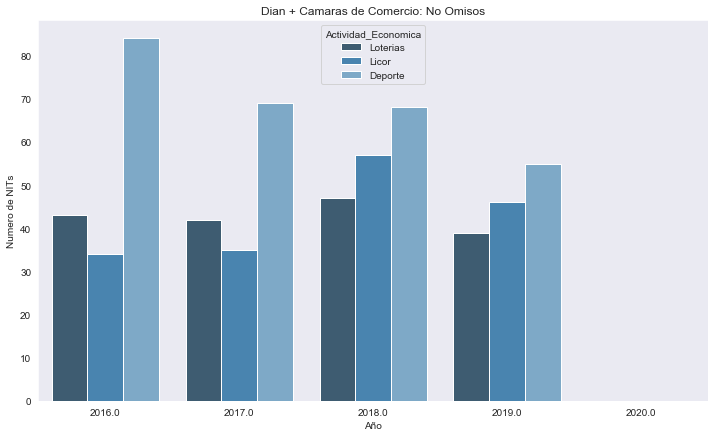

In [7]:
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="Año Gravable", y="NIT", hue='Actividad_Economica', 
                 data=Plot1, 
                 palette="Blues_d")

ax.set(xlabel='Año', ylabel='Numero de NITs', title = 'Dian + Camaras de Comercio: No Omisos')
plt.savefig('Dian Camaras Comercio_No Omisos.png')

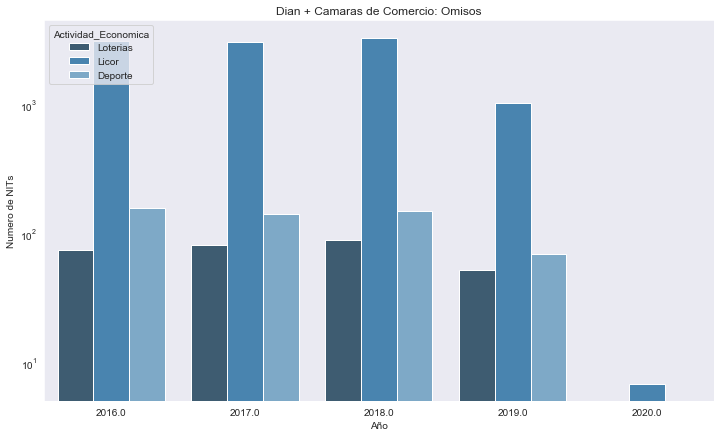

In [8]:
Plot2 = Dian_Municipios[['Actividad_Economica', 'Número Nit', 'Año Gravable']].groupby(['Actividad_Economica', 'Año Gravable']).count().reset_index().sort_values('Actividad_Economica', ascending =False)
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="Año Gravable", y="Número Nit", hue='Actividad_Economica', 
                 data=Plot2, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Año', ylabel='Numero de NITs', title = 'Dian + Camaras de Comercio: Omisos')
plt.savefig('Dian Camaras Comercio_Omisos.png')

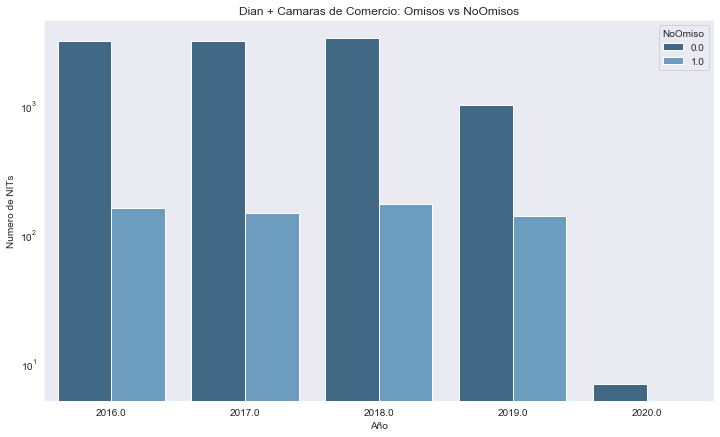

In [9]:
Plot3 = Dian_Municipios[['NoOmiso', 'Número Nit', 'Año Gravable']].groupby(['NoOmiso', 'Año Gravable']).count().reset_index().sort_values('Año Gravable', ascending =False)
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="Año Gravable", y="Número Nit", hue='NoOmiso', 
                 data=Plot3, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Año', ylabel='Numero de NITs', title = 'Dian + Camaras de Comercio: Omisos vs NoOmisos')
plt.savefig('Dian Camaras Comercio_Omisos vs NoOmisos.png')

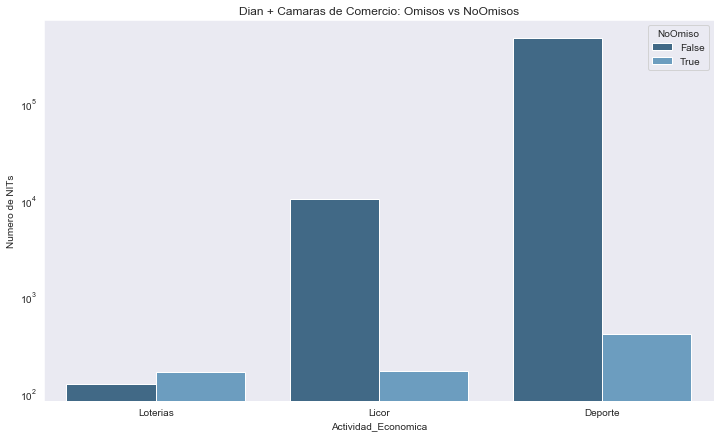

In [14]:
Plot4 = Dian_Municipios[['NoOmiso', 'Número Nit', 'Actividad_Economica']].groupby(['NoOmiso', 'Actividad_Economica']).count().reset_index().sort_values('Actividad_Economica', ascending =False)
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="Actividad_Economica", y="Número Nit", hue='NoOmiso', 
                 data=Plot4, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Actividad_Economica', ylabel='Numero de NITs', title = 'Dian + Camaras de Comercio: Omisos vs NoOmisos')
plt.savefig('Dian Camaras Comercio_Omisos vs NoOmisos_AcEc.png')

In [ ]:
#Dian_Deportes.columns
Dian_Deportes['NoOmiso'] = Dian_Deportes['NoOmiso'].fillna(False)

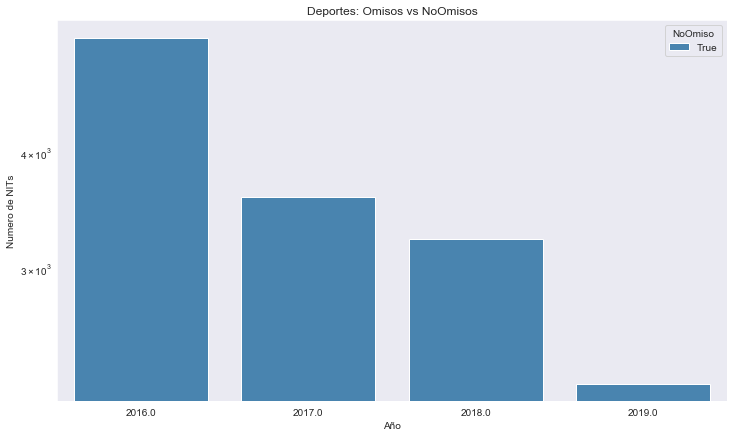

In [15]:
Plot5 = Dian_Deportes[['NoOmiso', 'Número Nit', 'Año Gravable']].groupby(['NoOmiso', 'Año Gravable']).count().reset_index().sort_values('Año Gravable', ascending =False)
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="Año Gravable", y="Número Nit", hue='NoOmiso', 
                 data=Plot5, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Año', ylabel='Numero de NITs', title = 'Deportes: Omisos vs NoOmisos')
plt.savefig('Deportes Omisos vs NoOmisos.png')

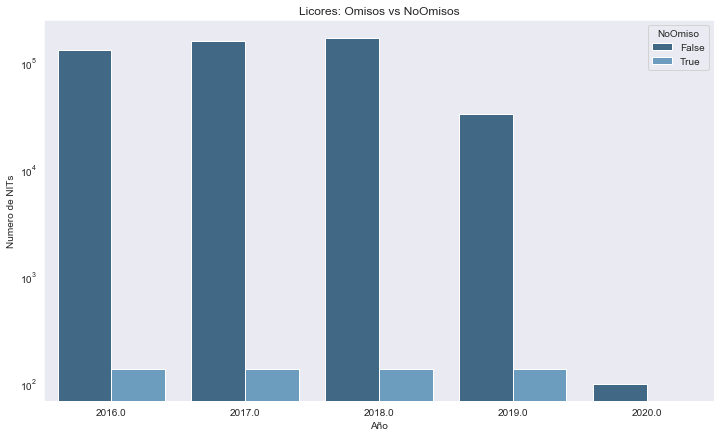

In [16]:
#Dian_Licores.columns
Dian_Licores['NoOmiso'] = Dian_Licores['NoOmiso'].fillna(False)

Plot6 = Dian_Licores[['NoOmiso', 'Número Nit', 'Año Gravable']].groupby(['NoOmiso', 'Año Gravable']).count().reset_index().sort_values('Año Gravable', ascending =False)
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="Año Gravable", y="Número Nit", hue='NoOmiso', 
                 data=Plot6, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Año', ylabel='Numero de NITs', title = 'Licores: Omisos vs NoOmisos')
plt.savefig('Licores Omisos vs NoOmisos.png')

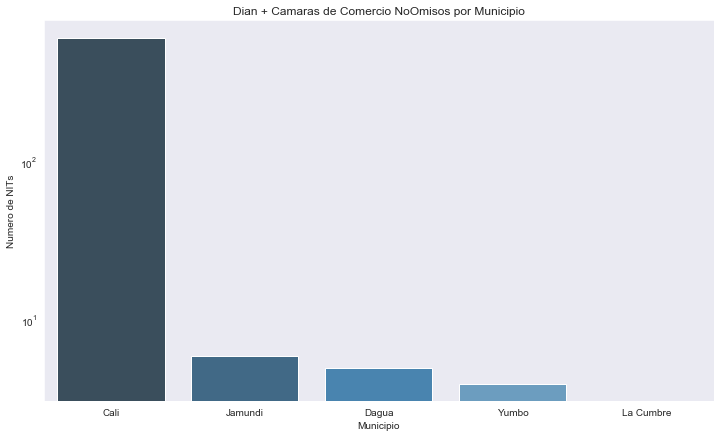

In [12]:
Plot7 = Dian_Municipios[['NoOmiso', 'Número Nit', 'MUNICIPIO_Clean']].groupby([ 'MUNICIPIO_Clean']).count().reset_index().sort_values('Número Nit', ascending =False).head()
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="MUNICIPIO_Clean", y="Número Nit", 
                 data=Plot7, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Municipio', ylabel='Numero de NITs', title = 'Dian + Camaras de Comercio NoOmisos por Municipio')
plt.savefig('Dian Camaras Comercio_NoOmisos Municipios.png')

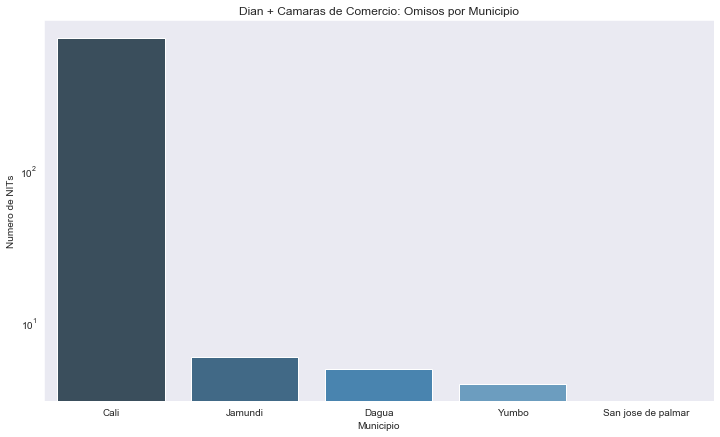

In [19]:
Plot8 = Dian_Municipios[['NoOmiso', 'Número Nit', 'MUNICIPIO']].groupby(['MUNICIPIO', 'NoOmiso']).count().reset_index().sort_values('Número Nit', ascending =False).head()
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="MUNICIPIO", y="Número Nit",
                 data=Plot8, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Municipio', ylabel='Numero de NITs', title = 'Dian + Camaras de Comercio: Omisos por Municipio')
plt.savefig('Dian Camaras Comercio_Omisos NoOmisos Municipios.png')

In [ ]:
Dian_Municipios[['NoOmiso', 'Número Nit', 'MUNICIPIO']].groupby(['MUNICIPIO', 'NoOmiso']).count().reset_index().sort_values('Número Nit', ascending =False).head()

In [ ]:
MunicipiosC = pd.read_csv('Municipios_Consolidado.csv', low_memory=False)

In [ ]:
MunicipiosC['MUNICIPIO'] = MunicipiosC['MUNICIPIO'].str.capitalize()
Plot9 = MunicipiosC[['NIT', 'MUNICIPIO']].groupby(['MUNICIPIO']).count().reset_index().sort_values('NIT', ascending =False).head()
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="MUNICIPIO", y="NIT",
                 data=Plot9, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Municipio', ylabel='Numero de NITs', title = 'Camaras de Comercio: NITs por Municipio')
plt.savefig('Camaras de Comercio NITs por Municipio.png')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = 95.1,
    number = {'suffix': "%"},
    title = {"text": "<br><span style='font-size:1.1em;color:red'>Omisos<br><span style='font-size:0.8em;color:gray'>4604</span>"},
    domain = {'x': [0.5, 0.5], 'y': [0.5, 0.5]}))

fig.update_layout(paper_bgcolor = "lightgray", width= 500, height= 300,
                 margin=dict(l=10, r=10, t=10, b=10, pad=4)
                 )

fig.show()

In [ ]:
municipios = Dian_Municipios['MUNICIPIO'].unique()
municipio = { i : municipios[i] for i in range(0, len(municipios) ) }
options=[{"label": key, "value": municipio[key]} for key in municipio.keys()]

In [ ]:
DIAN = pd.read_csv('Dian_Consolidado.csv', low_memory=False)
DIAN.columns

In [ ]:
#DIAN['MUNICIPIO'] = DIAN['MUNICIPIO'].str.capitalize()
Plot9 = MunicipiosC[['NIT', 'MUNICIPIO']].groupby(['MUNICIPIO']).count().reset_index().sort_values('NIT', ascending =False).head()
plt.figure(figsize=(12, 7))
sns.set_style("dark")
ax = sns.barplot(x="MUNICIPIO", y="NIT",
                 data=Plot9, 
                 palette="Blues_d")
ax.set_yscale("log")
ax.set(xlabel='Municipio', ylabel='Numero de NITs', title = 'Camaras de Comercio: NITs por Municipio')
plt.savefig('Camaras de Comercio NITs por Municipio.png')